In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
sns.set_context("talk", font_scale = 1.4)

/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = 2
b = 2
num_prime = 30
X = np.linspace(0,1,4)[:,None]
X_prime = np.linspace(0,1,num_prime)[:,None]
Y = scipy.stats.beta.pdf(X, a, b)

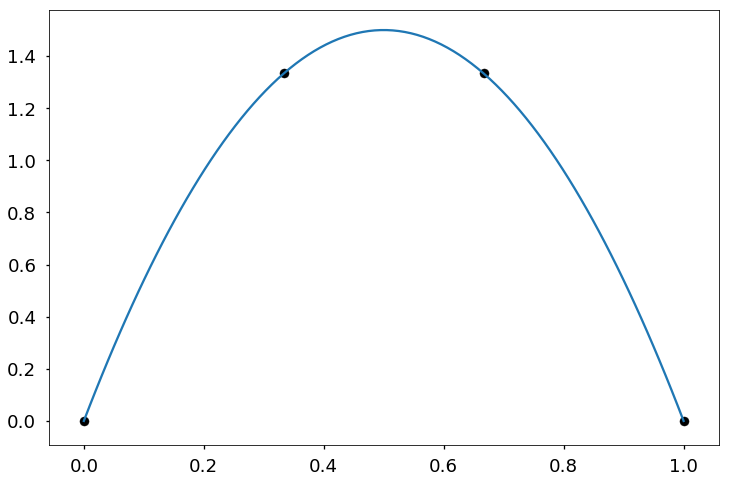

In [22]:
Xplot = np.linspace(0,1,100)[:,None]
Yplot = scipy.stats.beta.pdf(Xplot, a, b)
plt.figure(figsize = (12,8))
plt.plot(Xplot, Yplot)
plt.scatter(X, Y, color = 'k')

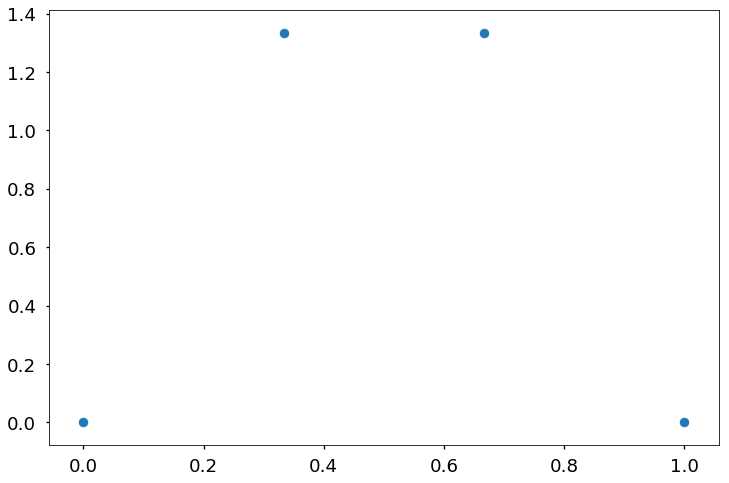

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(X, Y)

In [5]:
import sys
sys.path.append('../')
from GPFlowUnimodal.ker_w_der import ExtendRBF1D
from GPFlowUnimodal.unimodal_gpmc import UnimodalGPMC

In [6]:
m = UnimodalGPMC(X, Y, X_prime)
m.likelihood.noise_variance = 0.01
m.likelihood.noise_variance.fixed = True

In [7]:
m

Name,values,prior,constraint
unimodal_model.Vf,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.Vg,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.kern_f.lengthscale,[1.],None,+ve
unimodal_model.kern_f.signal_variance,[1.],None,+ve
unimodal_model.kern_g.lengthscale,[1.],None,+ve
unimodal_model.kern_g.signal_variance,[1.],None,+ve
unimodal_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [8]:
m.kern_f.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_f.signal_variance.prior = gpflow.priors.Gamma(1.,1.)
m.kern_g.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_g.signal_variance.prior = gpflow.priors.Gamma(1.,1.)

In [9]:
m.optimize(maxiter=150) # start near MAP

      fun: array([97.49064598])
 hess_inv: <98x98 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.32582722e+00,  1.16339425e+00, -8.31968276e-01,  3.08691805e-02,
        1.63711496e-02, -4.57536309e-03, -3.50673160e-03, -3.54352890e-03,
       -3.78436359e-03, -3.51266072e-03, -2.80546309e-03, -2.02851695e-03,
       -1.35334456e-03, -7.71891707e-04, -2.40808499e-04,  2.33812935e-04,
        5.93085395e-04,  7.95015929e-04,  8.62383655e-04,  8.54192169e-04,
        8.22601053e-04,  7.99465886e-04,  8.02471875e-04,  8.43216698e-04,
        9.27279948e-04,  1.04337257e-03,  1.14806270e-03,  1.17009768e-03,
        1.06010365e-03,  8.43400910e-04,  5.95976731e-04,  3.79340411e-04,
        2.16741449e-04,  1.06508748e-04,  1.03006911e-01, -1.03467602e+00,
        4.00611964e-02, -2.49773366e-01,  9.61490650e-02,  2.80751598e-01,
        2.09308408e-01,  1.10979158e-01,  8.70752797e-02,  1.06874689e-01,
        1.22205573e-01,  1.09987392e-01,  8.27040137e-02,  5.97957645e-02,

In [11]:
samples = m.sample(1000, Lmax = 20, epsilon = 0.01, thin = 5, burn = 500, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  71.0 %
Iteration:  200 	 Acc Rate:  72.0 %
Iteration:  300 	 Acc Rate:  85.0 %
Iteration:  400 	 Acc Rate:  70.0 %
Iteration:  500 	 Acc Rate:  74.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  69.0 %
Iteration:  200 	 Acc Rate:  74.0 %
Iteration:  300 	 Acc Rate:  68.0 %
Iteration:  400 	 Acc Rate:  51.0 %
Iteration:  500 	 Acc Rate:  73.0 %
Iteration:  600 	 Acc Rate:  78.0 %
Iteration:  700 	 Acc Rate:  78.0 %
Iteration:  800 	 Acc Rate:  80.0 %
Iteration:  900 	 Acc Rate:  73.0 %
Iteration:  1000 	 Acc Rate:  62.0 %
Iteration:  1100 	 Acc Rate:  62.0 %
Iteration:  1200 	 Acc Rate:  76.0 %
Iteration:  1300 	 Acc Rate:  40.0 %
Iteration:  1400 	 Acc Rate:  70.0 %
Iteration:  1500 	 Acc Rate:  86.0 %
Iteration:  1600 	 Acc Rate:  65.0 %
Iteration:  1700 	 Acc Rate:  82.0 %
Iteration:  1800 	 Acc Rate:  85.0 %
Iteration:  1900 	 Acc Rate:  69.0 %
Iteration:  2000 	 Acc Rate:  74.0 %
Iteration:  2100 	 Acc Rate:  74.0 %
Iter

In [12]:
#plt.figure(figsize=(16, 4))
#plt.plot(samples)

In [13]:
sample_df = m.get_samples_df(samples)
sample_df.head()

,unimodal_model.Vf,unimodal_model.Vg,unimodal_model.kern_f.lengthscale,unimodal_model.kern_f.signal_variance,unimodal_model.kern_g.lengthscale,unimodal_model.kern_g.signal_variance,unimodal_model.likelihood.noise_variance
0,"[[-0.02493190109870564], [1.0244007246322488],...","[[1.2456239528188013], [-0.05521180726297866],...",[0.5772596853571569],[6.086102884337573],[0.48429776228784616],[3.8094304927350136],[0.01]
1,"[[-0.022914669660865927], [0.9105625078203984]...","[[1.305072756197104], [-0.2781662757512304], [...",[0.5538635413974752],[6.263126692534748],[0.48089507079957416],[3.913578925126234],[0.01]
2,"[[0.013306861865266821], [0.9560500077327946],...","[[0.9198348054572103], [-0.15610300066339325],...",[0.6038344244653207],[6.289344820902243],[0.638289312605737],[3.908012880958098],[0.01]
3,"[[0.035530054236382974], [0.9486926957577989],...","[[0.8831833282281644], [-0.25703528419788385],...",[0.6333967175826632],[6.111769683538898],[0.7164382842073519],[3.6362930832522435],[0.01]
4,"[[0.04748225241079313], [1.0158574465619237], ...","[[1.0128189666354557], [-0.1459239567663912], ...",[0.6405281759151757],[6.186192002946454],[0.6680455641941414],[3.7194058311688187],[0.01]


In [14]:
num_prime = 2

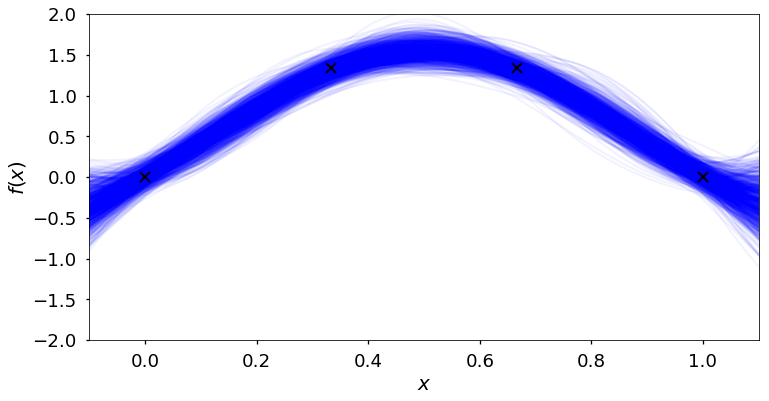

In [23]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 20)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-2, 2)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.savefig('1_' + str(num_prime) + '.png', dpi = 400)

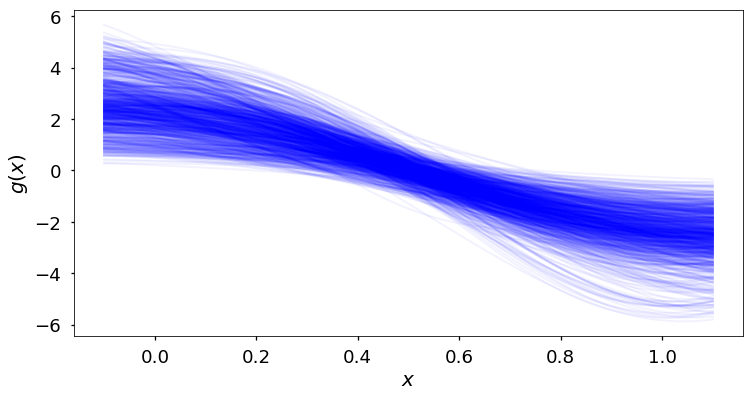

In [25]:
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 200)
    plt.plot(xx, g[0,:,:], 'b', lw=2, alpha = 0.05)
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.savefig('2_' + str(num_prime) + '.png', dpi = 400)

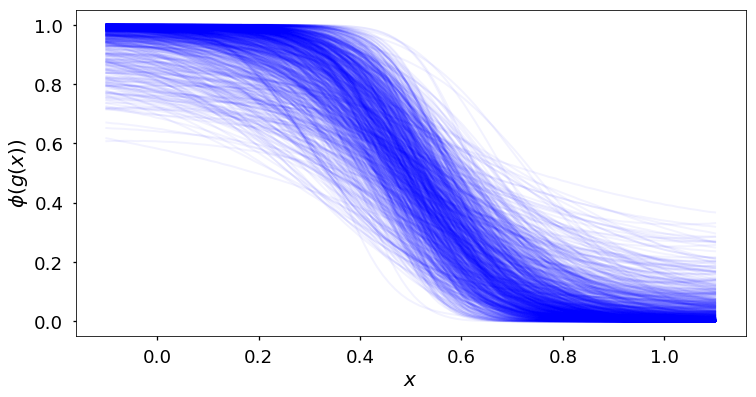

In [24]:
from scipy.stats import norm
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 200)
    plt.plot(xx, norm.cdf(g[0,:,:]), 'b', lw=2, alpha = 0.05)
plt.xlabel('$x$')
plt.ylabel('$\phi(g(x))$')
plt.savefig('3_' + str(num_prime) + '.png', dpi = 400)

In [18]:
meanmat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
varmat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean, v = m.predict_f(xx)
    var = v[:,:,0]
    meanmat[i,:] = mean[:,0]
    varmat[i,:] = np.diag(var)

In [19]:
def visualize_utility(Xgrid, Mgrid, Vargrid):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Stdgrid = np.sqrt(Vargrid)
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    #plt.figure(figsize=(12,8))
    #plt.plot(Xgrid[:,0], lower, 'g')
    #plt.plot(Xgrid[:,0], upper, 'r')
    #plt.plot(Xgrid[:,0], Mgrid, 'b')
    
    line, = plt.plot(Xgrid, Mgrid, lw = 2)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = line.get_color(), alpha = 0.25)
    #plt.xlabel('Temperature degC')
    #plt.ylabel('Utility')
    #plt.title('Utility at different temp values')
    return

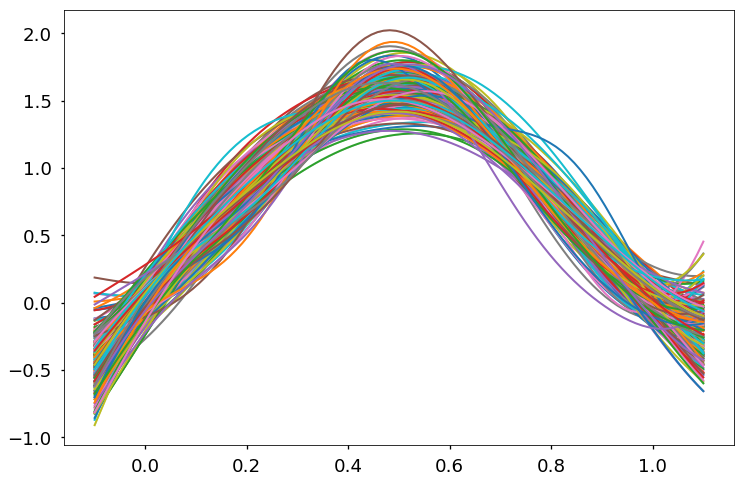

In [20]:
plt.figure(figsize=(12,8))
for i in xrange(200):
    visualize_utility(xx, meanmat[i,:], varmat[i,:])
plt.savefig('4_' + str(num_prime) + '.png', dpi = 400)

In [21]:
g.shape

(200, 100, 1)